# Cleaning transactions for pairplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns
import utils
from scipy.stats import zscore
from scipy import stats
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from fbprophet import Prophet

plt.style.use('fivethirtyeight')

### 2020 -January

In [2]:
df = pd.read_csv('transactions-2020-utf8.csv', encoding='UTF-8', sep = '\t', parse_dates=[['Date', 'Time']])

In [3]:
df.head()

,Date_Time,Time Zone,Gross Sales,Discounts,Net Sales,Gift Card Sales,Tax,Tip,Partial Refunds,Total Collected,...,Device Nickname,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Refund Reason,E-money,Discount Name,Transaction Status
0,2020-02-29 16:52:04,Tokyo,¥742,¥0,¥742,¥0,¥59,¥0,¥0,¥801,...,Nawate Cafe 3,3ZFJ7M38AYNC8YN188BY12E74TQH,03/05/20,https://squareup.com/dashboard/sales/deposits/...,3.25,¥0,NaN,¥0,NaN,Complete
1,2020-02-29 16:51:05,Tokyo,¥485,¥0,¥485,¥0,¥38,¥0,¥0,¥523,...,Nawate Cafe 1,3ZFJ7M38AYNC8YN188BY12E74TQH,03/05/20,https://squareup.com/dashboard/sales/deposits/...,3.25,¥0,NaN,¥0,NaN,Complete
2,2020-02-29 16:45:36,Tokyo,¥276,¥0,¥276,¥0,¥22,¥0,¥0,¥298,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
3,2020-02-29 16:37:51,Tokyo,"¥1,038",¥0,"¥1,038",¥0,¥83,¥0,¥0,"¥1,121",...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
4,2020-02-29 16:34:01,Tokyo,"¥1,104",¥0,"¥1,104",¥0,¥88,¥0,¥0,"¥1,192",...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete


In [4]:
df = df[['Date_Time', 'Total Collected']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8274 entries, 0 to 8273
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Time        8274 non-null   datetime64[ns]
 1   Total Collected  8274 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 129.4+ KB


In [6]:
# Cleaning Total Collected
df['Total Collected'] = df['Total Collected'].str.replace('¥', '')
df['Total Collected'] = df['Total Collected'].str.replace(',', '')
df['Total Collected'] = df['Total Collected'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8274 entries, 0 to 8273
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Time        8274 non-null   datetime64[ns]
 1   Total Collected  8274 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 129.4 KB


In [8]:
df.head()

,Date_Time,Total Collected
0,2020-02-29 16:52:04,801
1,2020-02-29 16:51:05,523
2,2020-02-29 16:45:36,298
3,2020-02-29 16:37:51,1121
4,2020-02-29 16:34:01,1192


In [9]:
# To delete returns 
df=df.drop(df[df['Total Collected'] < 0].index)

In [10]:
# Renaming
df.rename(columns={'Date_Time': 'Datetime' ,'Total Collected':'Total'}, inplace=True)

<Figure size 576x576 with 0 Axes>

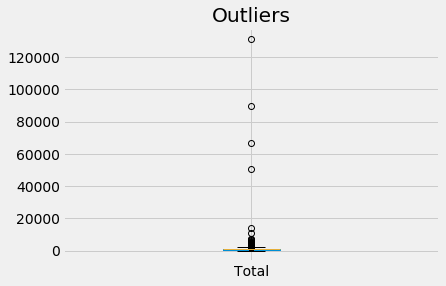

In [11]:
# Ploting outliers
plt.figure(figsize=(8,8))
df.plot.box()
plt.title('Outliers')
plt.show();

In [12]:
#Removing outliers
q1=np.percentile(df.Total, 25)
q3=np.percentile(df.Total, 75)

In [13]:
iqr=q3-q1

upper=q3+3*iqr
lower=q3-3*iqr

In [14]:
len(df[df.Total < lower])

0

In [15]:
df_outliers=df[df.Total < upper]
df_outliers.shape

(8120, 2)

<Figure size 576x576 with 0 Axes>

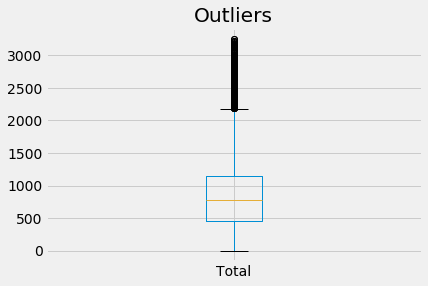

In [16]:
plt.figure(figsize=(8,8))
df_outliers.plot.box()
plt.title('Outliers')
plt.show();

In [17]:
split_date='2020-02-01'
january = df_outliers.loc[df_outliers.Datetime < split_date].copy()


In [18]:
df_20=january

In [19]:
df_20 = df_20.reset_index(drop=True)

In [20]:
#df_20

### 2019 Data

In [21]:
df = pd.read_csv('transactions-2019-utf8.csv', encoding='UTF-8', sep = '\t', parse_dates=[['Date', 'Time']])

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (17,18,35) have mixed types.Specify dtype option on import or set low_memory=False.



In [22]:
df.head()

,Date_Time,Time Zone,Gross Sales,Discounts,Net Sales,Gift Card Sales,Tax,Tip,Partial Refunds,Total Collected,...,Device Nickname,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Refund Reason,E-money,Discount Name,Transaction Status
0,2019-12-31 13:56:36,Tokyo,¥308,¥0,¥308,¥0,¥24,¥0,¥0,¥332,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
1,2019-12-31 13:55:34,Tokyo,"¥1,225",¥0,"¥1,225",¥0,¥98,¥0,¥0,"¥1,323",...,Nawate Cafe 3,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
2,2019-12-31 13:50:27,Tokyo,¥168,¥0,¥168,¥0,¥13,¥0,¥0,¥181,...,Nawate Cafe 3,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
3,2019-12-31 13:48:57,Tokyo,¥557,¥0,¥557,¥0,¥46,¥0,¥0,¥603,...,Nawate Cafe 3,3Z6XBTC4HG348YN7ZZBY12E74TQH,01/06/20,https://squareup.com/dashboard/sales/deposits/...,3.25,¥0,NaN,¥0,NaN,Complete
4,2019-12-31 13:41:17,Tokyo,¥345,¥0,¥345,¥0,¥27,¥0,¥0,¥372,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete


In [23]:
df = df[['Date_Time', 'Total Collected']]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48742 entries, 0 to 48741
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Time        48742 non-null  datetime64[ns]
 1   Total Collected  48742 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 761.7+ KB


In [25]:
# Cleaning Total Collected
df['Total Collected'] = df['Total Collected'].str.replace('¥', '')
df['Total Collected'] = df['Total Collected'].str.replace(',', '')
df['Total Collected'] = df['Total Collected'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48742 entries, 0 to 48741
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Time        48742 non-null  datetime64[ns]
 1   Total Collected  48742 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 761.7 KB


In [27]:
df.head()

,Date_Time,Total Collected
0,2019-12-31 13:56:36,332
1,2019-12-31 13:55:34,1323
2,2019-12-31 13:50:27,181
3,2019-12-31 13:48:57,603
4,2019-12-31 13:41:17,372


In [28]:
# To delete returns 
df=df.drop(df[df['Total Collected'] < 0].index)

In [29]:
# Renaming
df.rename(columns={'Date_Time': 'Datetime' ,'Total Collected':'Total'}, inplace=True)

<Figure size 576x576 with 0 Axes>

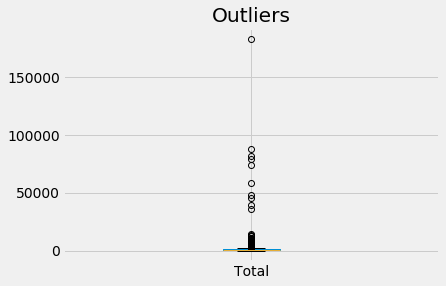

In [30]:
# Ploting outliers
plt.figure(figsize=(8,8))
df.plot.box()
plt.title('Outliers')
plt.show();

In [31]:
#Removing outliers
q1=np.percentile(df.Total, 25)
q3=np.percentile(df.Total, 75)

In [32]:
iqr=q3-q1

upper=q3+3*iqr
lower=q3-3*iqr

In [33]:
len(df[df.Total < lower])

0

In [34]:
df_outliers=df[df.Total < upper]
df_outliers.shape

(47897, 2)

<Figure size 576x576 with 0 Axes>

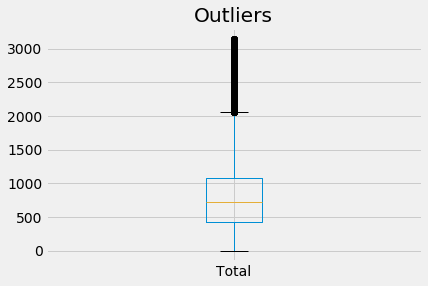

In [35]:
plt.figure(figsize=(8,8))
df_outliers.plot.box()
plt.title('Outliers')
plt.show();

In [36]:
df_19=df_outliers

In [37]:
#df_19

### 2018 Data

In [38]:
df = pd.read_csv('transactions-2018_utf8.csv', encoding='UTF-8', sep = '\t', parse_dates=[['Date', 'Time']])

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (13,23,32,33,34,37,38,39,41) have mixed types.Specify dtype option on import or set low_memory=False.



In [39]:
df.head()

,Date_Time,Time Zone,Gross Sales,Discounts,Net Sales,Gift Card Sales,Tax,Tip,Partial Refunds,Total Collected,...,Device Nickname,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Refund Reason,E-money,Discount Name,Transaction Status
0,2018-12-31 14:04:44,Tokyo,¥371,¥0,¥371,¥0,¥29,¥0,¥0,¥400,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
1,2018-12-31 14:03:49,Tokyo,"¥1,075",¥0,"¥1,075",¥0,¥85,¥0,¥0,"¥1,160",...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
2,2018-12-31 13:59:43,Tokyo,¥47,¥0,¥47,¥0,¥3,¥0,¥0,¥50,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
3,2018-12-31 13:50:34,Tokyo,¥862,¥0,¥862,¥0,¥68,¥0,¥0,¥930,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
4,2018-12-31 13:50:24,Tokyo,¥240,¥0,¥240,¥0,¥10,¥0,¥0,¥250,...,Nawate Cafe 3,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete


In [40]:
df = df[['Date_Time', 'Total Collected']]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31926 entries, 0 to 31925
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Time        31926 non-null  datetime64[ns]
 1   Total Collected  31926 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 499.0+ KB


In [42]:
# Cleaning Total Collected
df['Total Collected'] = df['Total Collected'].str.replace('¥', '')
df['Total Collected'] = df['Total Collected'].str.replace(',', '')
df['Total Collected'] = df['Total Collected'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31926 entries, 0 to 31925
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Time        31926 non-null  datetime64[ns]
 1   Total Collected  31926 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 499.0 KB


In [44]:
df.head()

,Date_Time,Total Collected
0,2018-12-31 14:04:44,400
1,2018-12-31 14:03:49,1160
2,2018-12-31 13:59:43,50
3,2018-12-31 13:50:34,930
4,2018-12-31 13:50:24,250


In [45]:
# To delete returns 
df=df.drop(df[df['Total Collected'] < 0].index)

In [46]:
# Renaming
df.rename(columns={'Date_Time': 'Datetime' ,'Total Collected':'Total'}, inplace=True)

<Figure size 576x576 with 0 Axes>

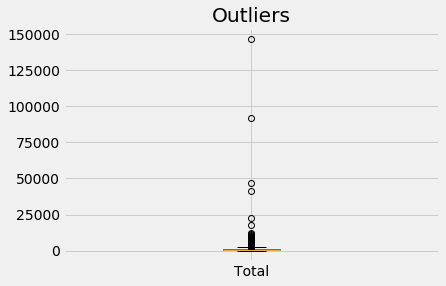

In [47]:
# Ploting outliers
plt.figure(figsize=(8,8))
df.plot.box()
plt.title('Outliers')
plt.show();

In [48]:
#Removing outliers
q1=np.percentile(df.Total, 25)
q3=np.percentile(df.Total, 75)

In [49]:
iqr=q3-q1

upper=q3+3*iqr
lower=q3-3*iqr

In [50]:
len(df[df.Total < lower])

0

In [51]:
df_outliers=df[df.Total < upper]
df_outliers.shape

(31367, 2)

<Figure size 576x576 with 0 Axes>

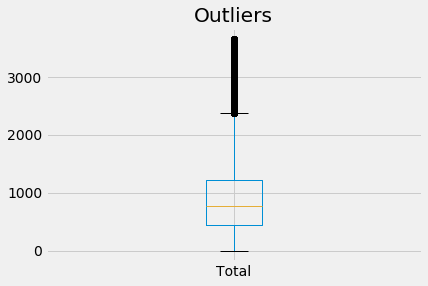

In [52]:
plt.figure(figsize=(8,8))
df_outliers.plot.box()
plt.title('Outliers')
plt.show();

In [53]:
df_18=df_outliers

In [54]:
#df_18

In [55]:
allyears = pd.concat((df_18, df_19, df_20))

In [56]:
allyears.sort_values(by=['Datetime'], inplace=True, ascending=True)

In [57]:
allyears = allyears.reset_index(drop=True)

In [58]:
allyears

,Datetime,Total
0,2018-04-26 09:04:15,520
1,2018-04-26 09:05:57,200
2,2018-04-26 09:07:21,350
3,2018-04-26 09:13:39,840
4,2018-04-26 09:17:07,290
...,...,...
83709,2020-01-31 16:14:57,1339
83710,2020-01-31 16:16:27,545
83711,2020-01-31 16:39:00,882
83712,2020-01-31 16:42:50,336


In [59]:
allyears.to_csv('allyears-pairplot.csv')


## Pairplot and model with individual transactions points

In [60]:
allyears = pd.read_csv('allyears-pairplot.csv', index_col=[1], parse_dates=[1])
allyears.drop(columns=['Unnamed: 0'], inplace=True)
allyears.tail()

,Total
Datetime,
2020-01-31 16:14:57,1339
2020-01-31 16:16:27,545
2020-01-31 16:39:00,882
2020-01-31 16:42:50,336
2020-01-31 16:53:40,434


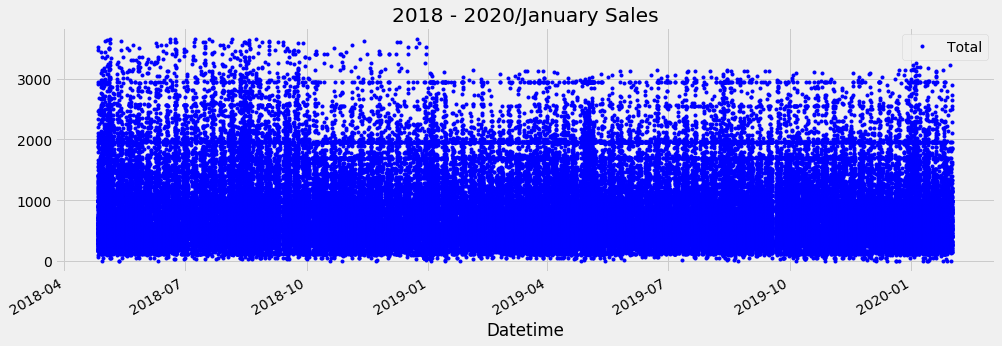

In [61]:
_=allyears.plot(style='.', figsize=(15,5), color='blue', title='2018 - 2020/January Sales')

In [62]:
def features(df, label):
    df=df.copy()
    df['date']=df.index
    df['hour']=df.date.dt.hour
    df['day_of_week']=df.date.dt.dayofweek
    df['quarter']=df.date.dt.quarter
    df['month']=df.date.dt.month
    df['year']=df.date.dt.year
    df['day_of_year']=df.date.dt.dayofyear
    df['day_of_month']=df.date.dt.day
    df['week_of_year']=df.date.dt.weekofyear
    
    X=df[['hour', 'day_of_week', 'quarter', 'month', 'year',
          'day_of_year', 'day_of_month', 'week_of_year']]
    y=df[label]
    
    return X,y

In [63]:
X, y = features(allyears, 'Total')
data=pd.concat([X, y], axis=1)
data.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,Total
Datetime,,,,,,,,,
2018-04-26 09:04:15,9,3,2,4,2018,116,26,17,520
2018-04-26 09:05:57,9,3,2,4,2018,116,26,17,200
2018-04-26 09:07:21,9,3,2,4,2018,116,26,17,350
2018-04-26 09:13:39,9,3,2,4,2018,116,26,17,840
2018-04-26 09:17:07,9,3,2,4,2018,116,26,17,290


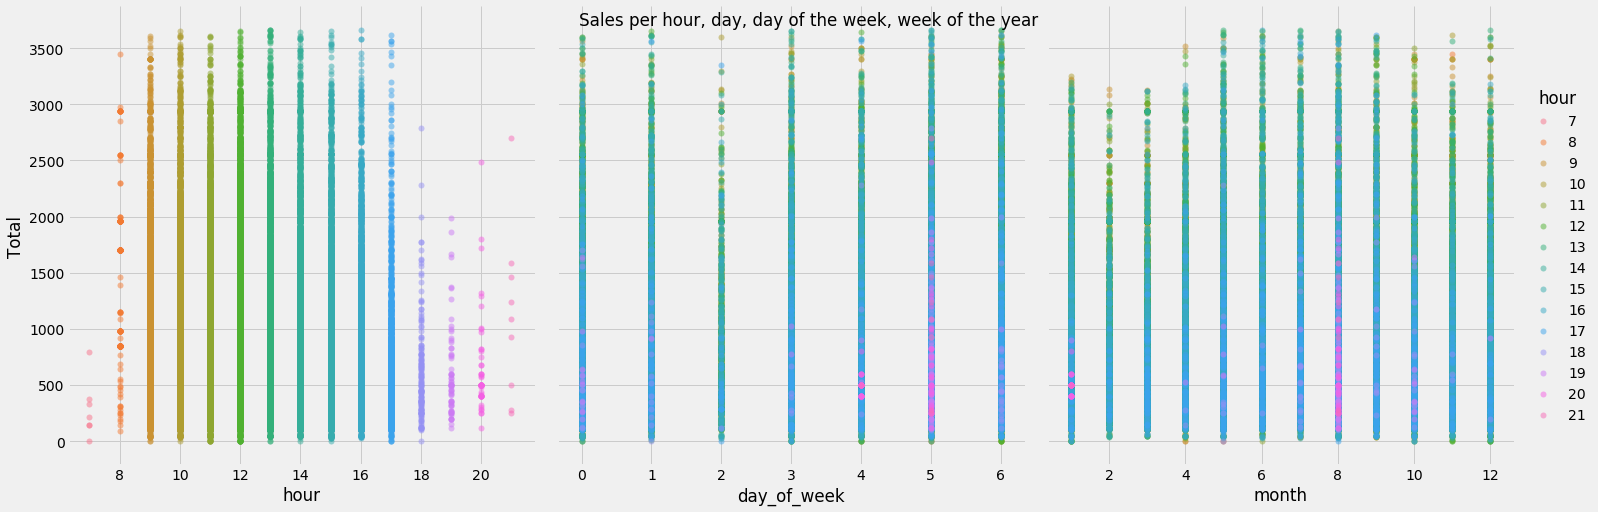

In [70]:
sns.pairplot(data.dropna(), hue='hour', 
            x_vars=['hour', 'day_of_week', 'month'],
            y_vars='Total', height=7, plot_kws={'alpha':0.5, 'linewidth':0})

plt.suptitle('Sales per hour, day, day of the week, week of the year')
plt.show();


In [117]:
plt.savefig('saving-a-seaborn-plot-as-eps-file.eps')

<Figure size 432x288 with 0 Axes>

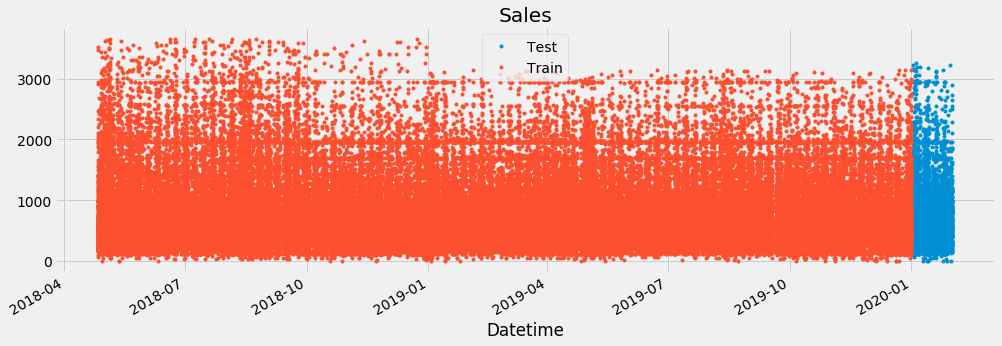

In [98]:
split_date='01-Jan-2020'

train=allyears.loc[allyears.index<=split_date].copy()
test=allyears.loc[allyears.index>split_date].copy()

_=test.rename(columns={'Total': 'Test'})\
      .join(train.rename(columns={'Total': 'Train'}), how='outer')\
      .plot(figsize=(15,5), title='Sales', style='.')

In [99]:
train=train.reset_index().rename(columns={'Datetime':'ds', 'Total':'y'})
test=test.reset_index().rename(columns={'Datetime':'ds', 'Total':'y'})
train.head()

,ds,y
0,2018-04-26 09:04:15,520
1,2018-04-26 09:05:57,200
2,2018-04-26 09:07:21,350
3,2018-04-26 09:13:39,840
4,2018-04-26 09:17:07,290


In [102]:
modelo=Prophet().fit(train)

pred=modelo.predict(test)


INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


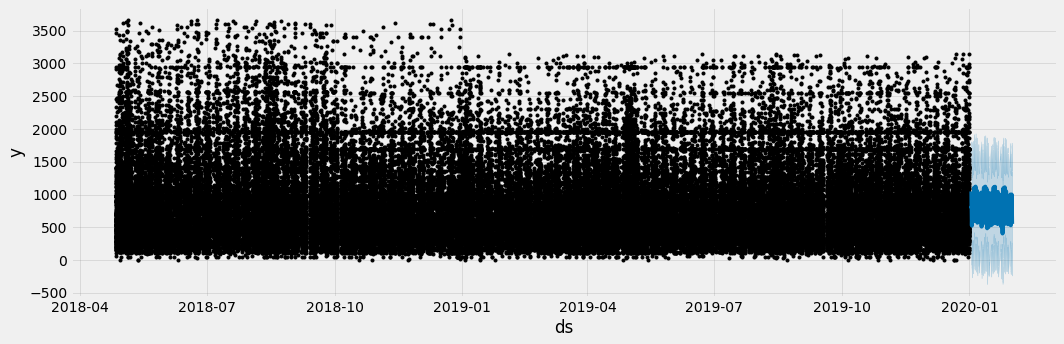

In [103]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig=modelo.plot(pred, ax=ax)

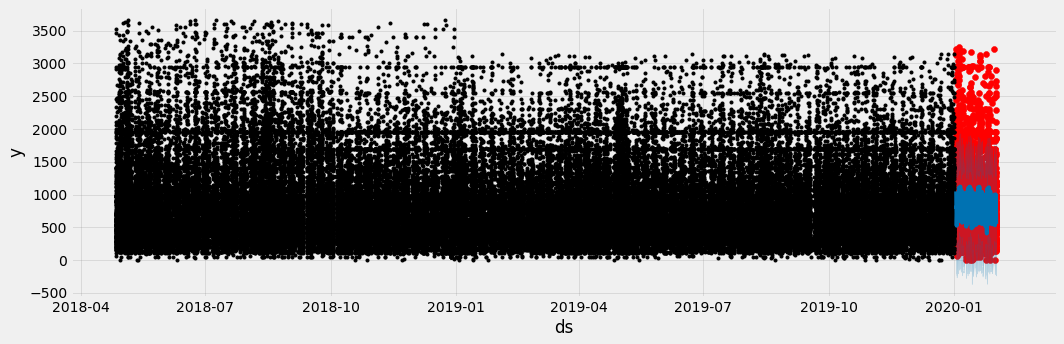

In [104]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

In [105]:
mean_squared_error(test.y, pred.yhat)**0.5

583.9411365999146

In [106]:
mean_absolute_error(test.y, pred.yhat)

429.1676195003241

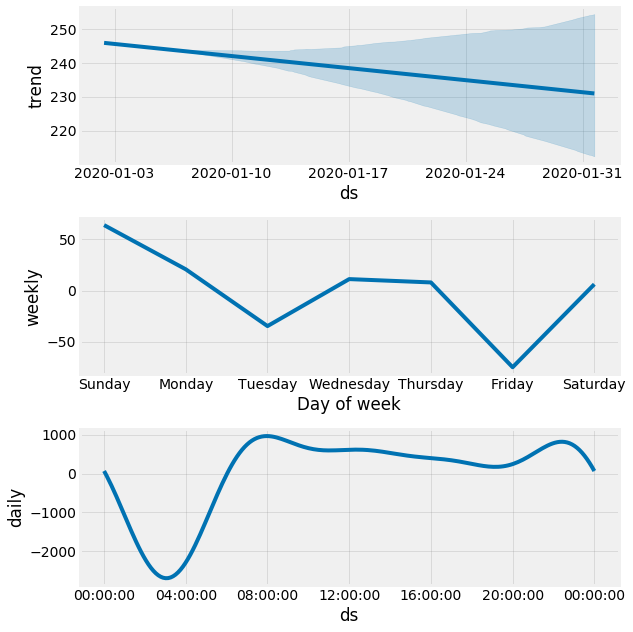

In [107]:
fig = modelo.plot_components(pred)
